# K-Means Clustering

## Import libraries

In [18]:
!pip install kneed

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns

## Mess Personnel Clustering

### Load Dataset

In [20]:
url = "https://raw.githubusercontent.com/evelinn11/Mess-Personnel-Dataset/refs/heads/main/mess_personnel.csv"
df = pd.read_csv(url)
df.head()

,Food,Protein,Fat
0,1,1.1,60
1,2,8.2,20
2,3,4.2,35
3,4,1.5,21
4,5,7.6,15


### Data Cleaning

In [21]:
df.drop(['Food'], axis=1, inplace=True)
df.head()

,Protein,Fat
0,1.1,60
1,8.2,20
2,4.2,35
3,1.5,21
4,7.6,15


### Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(scaler.fit_transform(df), columns=['Protein','Fat'])
df_minmax_scaled.head()

,Protein,Fat
0,0.000000,1.000000
1,1.000000,0.111111
2,0.436620,0.444444
3,0.056338,0.133333
4,0.915493,0.000000


### Elbow Method

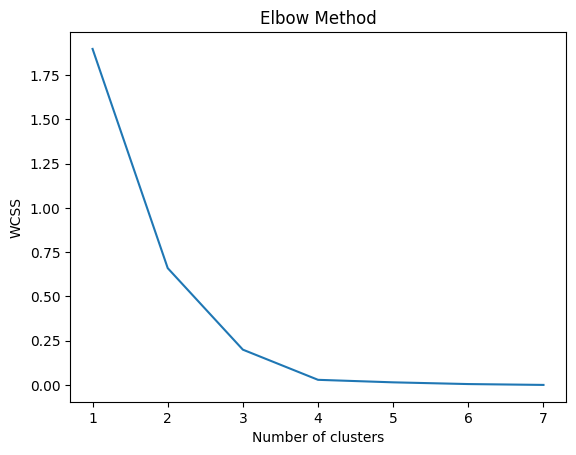

In [23]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_minmax_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

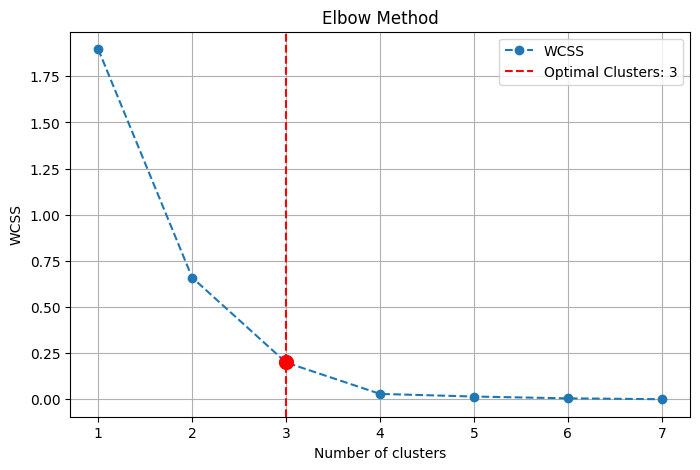

The optimal number of clusters is: 3


In [24]:
clusters = range(1, 8)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

print(f"The optimal number of clusters is: {optimal_clusters}")

### Modeling with KMeans

In [25]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_minmax_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Protein,Fat,KMeans_Cluster
0,1.1,60,2
1,8.2,20,1
2,4.2,35,0
3,1.5,21,0
4,7.6,15,1


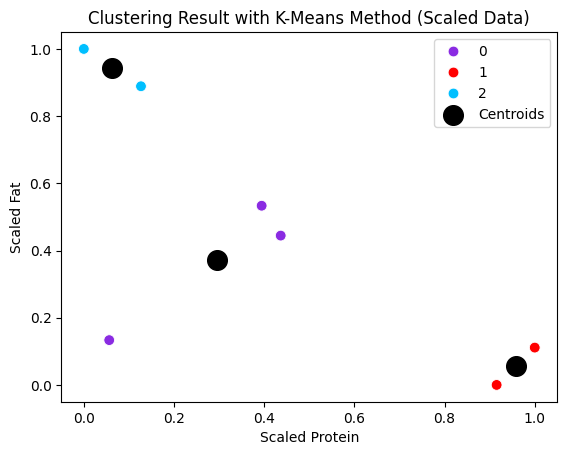

In [26]:
sns.scatterplot(x = "Protein", y = "Fat", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_minmax_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Protein")
plt.ylabel("Scaled Fat")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

## Iris Clustering

### Load Dataset

In [27]:
!pip install ucimlrepo

In [28]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [29]:
# Hanya menggunakan 2 fitur yaitu petal length dan petal width
df_iris = iris.data.features
df_iris = df_iris[['petal length', 'petal width']]
df_iris.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


### Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_iris_scaled = pd.DataFrame(scaler.fit_transform(df_iris), columns=['petal length', 'petal width'])
df_iris_scaled.head()

,petal length,petal width
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


### Elbow Method

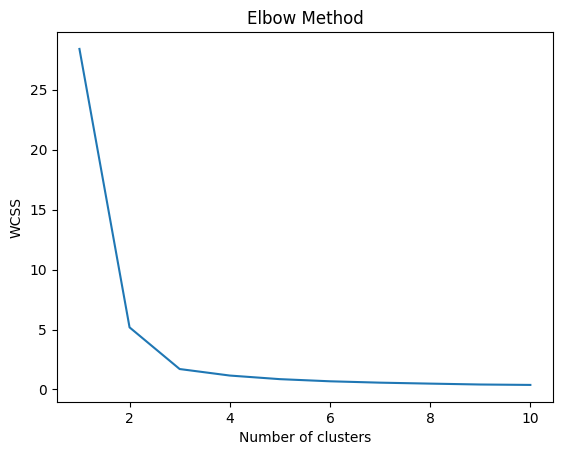

In [31]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_iris_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

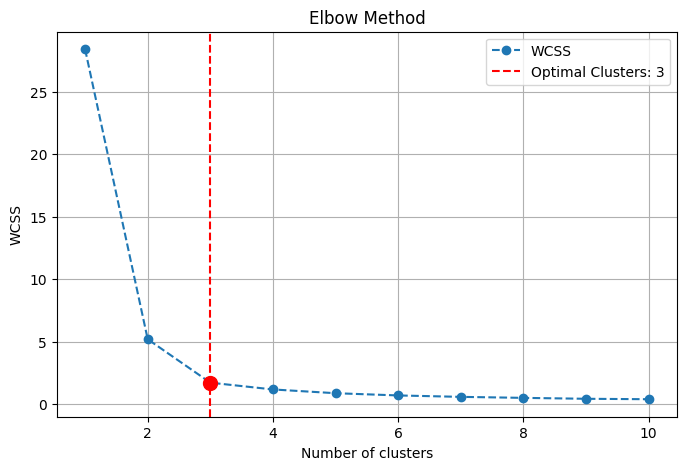

The optimal number of clusters is: 3


In [32]:
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

print(f"The optimal number of clusters is: {optimal_clusters}")

### Modeling with KMeans

In [33]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_iris_scaled)

df_iris_scaled['KMeans_Cluster'] = clusters
df_iris_scaled.head()

,petal length,petal width,KMeans_Cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


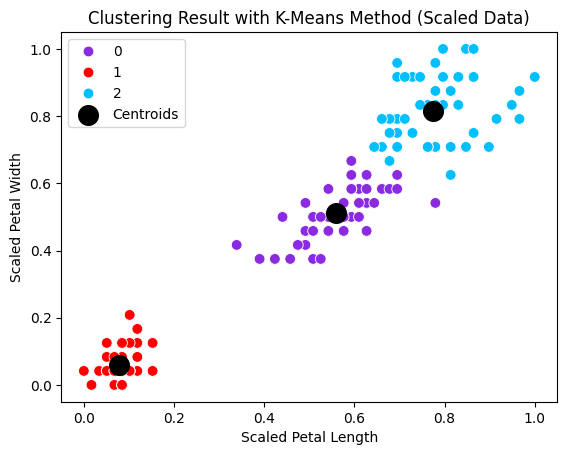

In [34]:
sns.scatterplot(x = "petal length", y = "petal width", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_iris_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Petal Length")
plt.ylabel("Scaled Petal Width")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()